<a href="https://colab.research.google.com/github/sergeyr0man0v/laboratory/blob/main/%D0%9A%D0%BE%D0%BF%D0%B8%D1%8F_%D0%B1%D0%BB%D0%BE%D0%BA%D0%BD%D0%BE%D1%82%D0%B0_%22lab_work_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа

Баллы за секции:
- *Задание 1* - 10 баллов
- *Задание 2* - 20 баллов
- *Задание 3* - 30 баллов
- **Итого** - 60 баллов

Оценка за лабу $ = \frac{score}{6}$

## Внимание! Attention! Achtung!

**Данная лабораторная работа является блокирующей**, т.е. если лабораторная работа не выполнена, то оценка за курс - неуд.

Лабораторная работа считается выполненной, если **за каждое из заданий получено не менее 2 баллов**.

## Формат сдачи лабораторной работы

Данная лабораторная работа сдается так же, как и проект - заполняете данный ноутбук, отправляете его через GitHub с указанием проверяющего.

**Ассистенты не будут запускать ячейки кода, а смотреть на выведенный результат и код. Если ячейка кода не запущена - балл не ставится, даже при правильно написанном коде.**

***(Комментарии что курс по Python легче чем по C++ учтены)***

>**Примечание**
>
>Данные задания вдохновлены предметом "Введение в анализ данных" 2 курса, по итогу которого идёт отбор на DS-поток. Если вы видите себя в смежных областях, советуем выполнить данную лабораторку по максимуму.

In [ ]:
# Всё необходимое для выполнения данной лабораторной работы!
import requests
from time import sleep

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Задание 1. Парсинг - 10 баллов

В этом задании Вам предстоит работать с API сайта <a target="_blank" href="hh.ru">hh.ru</a>. Документация доступна по <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">ссылке</a>.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, иначе вас забанят. Просрочка дедлайна по этой причине не принимается!</b>

**Задача:**
1. выбрать 5 интересующих вас профессий (не смежных, т.е. Аналатик и Data Engineer не считается корректным)
2. затем получить доступные по данным профессиям вакансии в Москве и выделить их физические координаты
3. нанести полученные координаты на карту местоположения компаний

*Пример запроса для профессии:*

In [ ]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Физик-ядерщик",
    'area': 1,
    'page': 0,
    'per_page': 10
}

data = requests.get(URL, params).json()

Если Ваш запрос прошел успешно, то вы получите следующие ключи (значения данных ключей вы найдете по ссылке на документацию):

In [ ]:
data.keys()

dict_keys(['items', 'found', 'pages', 'per_page', 'page', 'clusters', 'arguments', 'alternate_url'])

>**Примечание**
>
>В `data['pages']` будет хранится количество найденных страниц вакансий - для корректного сбора данных Вам нужно пробежать по **КАЖДОЙ** странице и сделать соотвествующие запросы.

>**Совет**
>
>Посмотрите что хранится в `items`!

(1 балл) Выберете для нас 5 наиболее интересных специальностей и получите по ним имеющиеся вакансии:

In [ ]:
data = []

def get(text):
  global data
  params = {
    'text': text,
    'area': 1,
    'page': 0,
    'per_page': 10
  }
  tmp = requests.get(URL, params).json()
  for i in range(tmp.get('pages', 0)):
    params['page'] = i
    data += requests.get(URL, params).json().get('items')
    sleep(2)

get('Лежать на диване')
get('Python Junior')
get('Гулять')
get('Системный администратор')
get('Спать')

for item in data:
    print(item['name'])




Агент "Мафии"
Рекрутер - оператор на телефоне (Удаленная работа)
Junior Python Developer (удаленно)
Исследователь данных, удаленно
Python junior
Аналитик данных / Data Analyst (Junior)
Python разработчик junior
Младший инженер по тестированию ПО
Младший программист (Junior Java Developer)
Python-разработчик (Junior)
Разработчик Python/Django (Junior/Middle)
Аналитик по качеству данных (Junior)
Инженер-программист junior
Младший backend разработчик
Разработчик Python (junior)
Data Scientist (Junior)
Junior Pro ML инженер
Разработчик Python (Junior)
Web-программист Python+Django (удаленно)
Младший инженер-тестировщик
Data scientist (Junior) в консалтинг
Младший аналитик данных
Junior Data scientist (Аналитик)
Junior Data scientist
Младший системный аналитик
Java-разработчик Big Data
C# developer junior / middle (.net, full-stack / back-end)
Junior Python/C# programmer
Junior Data Scientist / Младший аналитик данных
Стажер (аналитик)
Экономист-аналитик (junior/middle data scientist)
Младш

(1 балл) Посчитайте сколько всего найдено вакансий:

In [ ]:
len(data)

1672

(1 балл) Создайте структуру данных, которая будет хранить в себе имя компании и ее координаты (широта и долгота):

In [ ]:
class Company:
    def __init__(self, name, lat, lng):
        self.name = name
        self.lat = lat
        self.lng = lng

(1 балл) Создайте экземпляр этой структуры данных для каждой компании, которая выставила вакансию:

In [ ]:
companies = [Company(vacancy['employer']['name'], vacancy['address']['lat'], vacancy['address']['lng']) for vacancy in data if vacancy['address'] is not None]

(1 балл) Найдите количество вакансий, у которых заданы координаты (значения данных может быть пустым):

In [ ]:
len(companies)

1145

(1 балл) Отберите вакансии, которые расположены в пределах МКАД (можно грубо):

In [ ]:
inside = [vacancy for vacancy in data 
          if vacancy['address'] is not None 
          and vacancy['address']['lat'] is not None and vacancy['address']['lng'] is not None
          and 55.57 <= vacancy['address']['lat'] <= 55.92 and 37.36 <= vacancy['address']['lng'] <= 37.86]
len(inside)

979

(1 балл) Постройте график в координатах "широта-долгота" для отображения вакансий внутри МКАД (не забывайте прописать прозрачность, чтобы увидеть скопления):

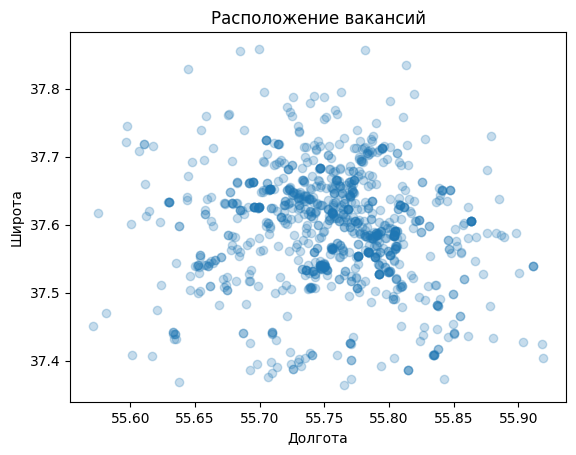

In [ ]:
%matplotlib inline

plt.scatter(
    [vacancy['address']['lat'] for vacancy in inside],
    [vacancy['address']['lng'] for vacancy in inside],
    alpha = 0.25
)
plt.title('Расположение вакансий')
plt.xlabel('Долгота')
plt.ylabel('Широта')
plt.show()

(1 балл) Нанесите все точки вакансий на карту (для этого вам поможет данная <a target="_blank" href="https://plotly.com/python/mapbox-layers/">документации</a>, не забудьте про прозрачность и центрирование по Москве): 

In [ ]:
import plotly.express as px
import plotly.graph_objs as go

for vacancy in inside:
    vacancy['lat'] = vacancy['address']['lat']
    vacancy['lng'] = vacancy['address']['lng']
    vacancy['salary_from'] = vacancy['salary']['from'] if vacancy['salary'] else '-'
    vacancy['salary_to'] = vacancy['salary']['to'] if vacancy['salary'] else '-'
    vacancy['salary_cur'] = vacancy['salary']['currency'] if vacancy['salary'] else '-'

fig = px.scatter_mapbox(
    inside,
    lat="lat", lon="lng", hover_data=['salary_from', 'salary_to', 'salary_cur'],
    color_discrete_sequence=["fuchsia"], zoom=10, height=600, opacity=0.4
)
map_center = go.layout.mapbox.Center(lat=55.745,
                                     lon=37.61)
fig.update_layout(mapbox_style="open-street-map",
                  mapbox=dict(center=map_center, zoom=10))
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.show()

(2 балла) **Сделайте выводы о проделанной работе:**

>*Подсказки для маленьких: Что вы можете сказать про районы Москвы? Что вы можете сказать про зарплаты? Что вы можете сказать про спрос?*

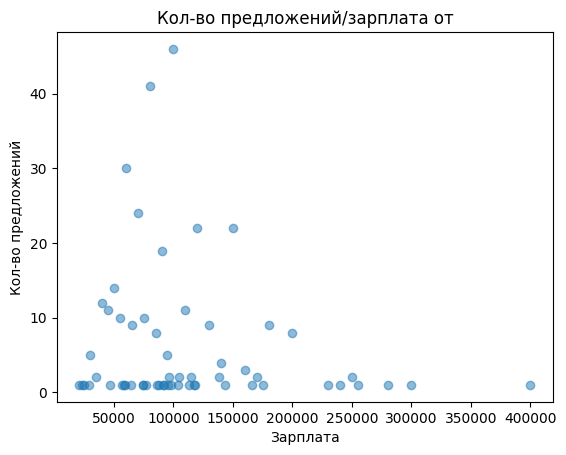

In [ ]:
with_salary = [vacancy['salary_from'] for vacancy in inside if vacancy['salary_from'] != '-']
val = list(set(with_salary))

plt.scatter(
    val,
    [with_salary.count(i) for i in val],
    alpha = 0.5
)
plt.title('Кол-во предложений/зарплата от')
plt.xlabel('Зарплата')
plt.ylabel('Кол-во предложений')
plt.show()

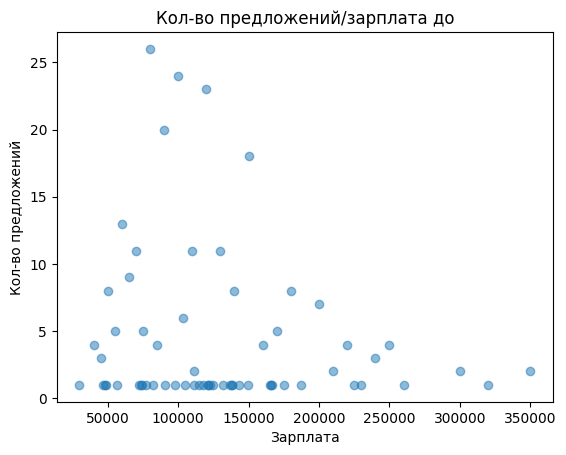

In [ ]:
with_upper_salary = [vacancy['salary_to'] for vacancy in inside if vacancy['salary_to'] != '-']

val = list(set(with_upper_salary))

plt.scatter(
    val,
    [with_upper_salary.count(i) for i in val],
    alpha = 0.5
)
plt.title('Кол-во предложений/зарплата до')
plt.xlabel('Зарплата')
plt.ylabel('Кол-во предложений')
plt.show()

  Больше всего вакансий в Пресненском и Савеловском районах. За центральм кольцом наблюдается резки спад числа предложений.

  График зарплат имеет большое количество выбросов для выборки из этих пяти профессий.

## Задание 2. Анализ данных - 20 баллов

Вам предстоит проанализировать датасет, содержащий информацию об бриллианта, их стоимости и остальных характеристиках.



Поясним значения хранящиеся в колонках:
*   `cut` - огранка бриллианта (относится к одной из примерно 10 наиболее распространенных)
*   `color` - цвет бриллианта, прозрачные бриллианты имеют градацию `D-Z`, "более высокие" буквы - более желтоватые, но часто имеют лучшие значения, поскольку цвет трудно определить один раз в кольце
*   `clarity` - чистота бриллианта, наличие включений (внутренних дефектов), чем меньше и мельче, тем лучше
*   `carat_weight` - масса бриллианта (слабо связана с размером бриллианта, т.к. огранка и качество огранки, как правило, играют большую роль)
*   `cut_quality` - качество ограники по системе оценки GIA Cut
*   `lab` - лаборатория оценивания
*   `meas_length` - длина бриллианта
*   `meas_width` - ширина бриллианта
*   `meas_depth` - глубина бриллианта
*   `total_sales_price` - цена бриллианта в долларах.
*    **и прочие колонки**

Скачаем данные:

In [ ]:
!gdown 1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU

Downloading...
From: https://drive.google.com/uc?id=1uIWeZFz3ElB5p1brBVEwJBHTbjXNPdfU
To: /content/diamonds.csv
100% 35.4M/35.4M [00:00<00:00, 177MB/s]


Создадим DataFrame:

In [ ]:
diamonds = pd.read_csv("diamonds.csv")

(0.5 балла) Выведете первые 5 строк датасета:

In [ ]:
diamonds.head(5)

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


(0.5 балла) Найдите количество бриллиантов всего в данном датасете:

In [ ]:
len(diamonds)

219703

(0.5 балла) Выведите максимальную и минимальную цену бриллианта в формате `номер - цена`:

In [ ]:
mx = diamonds['total_sales_price'].max()
mn = diamonds['total_sales_price'].min()
print(diamonds.loc[diamonds['total_sales_price'] == mx, ['total_sales_price']].head(1))
print(diamonds.loc[diamonds['total_sales_price'] == mn, ['total_sales_price']].head(1))

        total_sales_price
219702            1449881
   total_sales_price
0                200


(1 балл) Посчитайте количество пропусков (пропуском считается значение `unknown` или `None`):

In [ ]:
diamonds.isin(['unknown', None]).sum().sum()

1746027

(1 балл) Найдите в каких столбцах присутствуют пропуски:

In [ ]:
tmp = diamonds.isin(['unknown', None]).sum()
tmp[tmp > 0]

color                            9162
cut_quality                     60607
eye_clean                      156916
culet_size                      85740
culet_condition                204384
girdle_min                      83432
girdle_max                      84295
fluor_color                    203977
fluor_intensity                   128
fancy_color_dominant_color     210539
fancy_color_secondary_color    218641
fancy_color_overtone           217665
fancy_color_intensity          210541
dtype: int64

В нашем датасете присутствуют колонки, которые начинаются с `fancy_color_` или `fluor_`. Большинство значений в этих колонках - `unknown` или `None`, поэтому мы считаем их малоинформативными. 

Ваша задача:

1. (0.5 балла) найти количество таких колонок, которые начинаются с `fancy_color_` или `fluor_`:

In [ ]:
useless = [elem for elem in diamonds.axes[1] if elem.startswith('fancy_color_') or elem.startswith('fluor_')]
len(useless)

6

2. (0.5 балла) найти количество информативных (не `None` или `unknown`) значений в этих колонках: 

In [ ]:
tmp = (~diamonds.isin(['unknown', None])).sum()
tmp[useless]

fluor_color                     15726
fluor_intensity                219575
fancy_color_dominant_color       9164
fancy_color_secondary_color      1062
fancy_color_overtone             2038
fancy_color_intensity            9162
dtype: int64

3. (0.5 балла) удалить данные колонки из датасета, сохранив изменения (в дальнейшем работаем измененным датасетом):

In [ ]:
diamonds.drop(columns=useless, axis = 1, inplace=True)

(1 балл) Проделайте тоже самое для колонок, начинающихся с `culet_`:

In [ ]:
useless2 = [elem for elem in diamonds.axes[1] if elem.startswith('culet_')]
diamonds.drop(columns=useless2, axis = 1, inplace=True)

(1 балл) Посчитайте сколько бы стоил (в тысячах долларов) сейф, в котором хранились бы все бриллианты из датасета:

In [ ]:
diamonds['total_sales_price'].sum()

1517721991

Немного необоснованных манипуляций.

(1 балл) Выберите из датасета строки с четными индексами и выведете значения (не меняя нумерацию индексов):

In [ ]:
diamonds.loc[::2]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.1,59.0,2.88,2.90,1.77,TN,M,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,64.9,58.5,2.79,2.83,1.82,STK,STK,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
8,8,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,63.5,59.5,2.89,2.92,1.85,STK,TK,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219694,219695,Round,D,IF,12.52,Excellent,HRD,Excellent,Excellent,unknown,62.1,58.0,14.84,14.91,9.24,unknown,unknown,1121792
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347
219698,219699,Round,E,VS1,10.65,Excellent,GIA,Excellent,Excellent,unknown,61.3,58.0,14.06,14.18,8.66,M,STK,1210692
219700,219701,Round,E,VS1,18.07,Excellent,GIA,Excellent,Excellent,unknown,60.2,59.0,17.06,17.10,10.20,TN,M,1315496


(0.5 балла) А теперь с индексами, кратными 6:

In [ ]:
diamonds.loc[::6]

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,depth_percent,table_percent,meas_length,meas_width,meas_depth,girdle_min,girdle_max,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,62.7,59.0,2.85,2.87,1.79,M,M,200
6,6,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,64.0,57.0,2.85,2.88,1.84,STK,STK,200
12,12,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,61.8,58.5,2.85,2.89,1.77,STK,TK,200
18,18,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,61.0,60.0,2.91,2.92,1.78,M,M,200
24,24,Round,L,I1,0.34,Excellent,IGI,Excellent,Excellent,unknown,0.0,0.0,0.00,0.00,0.00,unknown,unknown,204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219678,219679,Round,G,VS1,10.23,Excellent,GIA,Excellent,Excellent,unknown,62.7,55.0,13.82,13.92,8.69,TN,M,859320
219684,219685,Radiant,unknown,I1,0.89,unknown,GIA,Good,Good,unknown,63.8,57.0,6.44,4.96,3.16,TK,VTK,982560
219690,219691,Round,D,VVS2,10.10,Excellent,GIA,Excellent,Excellent,unknown,59.4,59.0,14.07,14.15,8.39,M,STK,1040739
219696,219697,Oval,H,VS2,18.88,unknown,GIA,Excellent,Excellent,unknown,57.1,55.0,21.34,15.23,8.69,TN,STK,1132347


(1 балл) Выберете из датасета только категорильные признаки и выведете датасет:

In [ ]:
categories = []
for name in diamonds.columns:
  if type(diamonds[name][0]) == str:
    categories.append(name)
diamonds.loc[:, categories]

,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,girdle_min,girdle_max
0,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,M
1,Round,E,VVS2,Very Good,IGI,Very Good,Very Good,unknown,STK,STK
2,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,TN,M
3,Round,E,VVS2,Excellent,IGI,Very Good,Very Good,unknown,M,STK
4,Round,E,VVS2,Very Good,IGI,Very Good,Excellent,unknown,STK,STK
...,...,...,...,...,...,...,...,...,...,...
219698,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,M,STK
219699,Radiant,unknown,VS2,unknown,GIA,Very Good,Very Good,unknown,TK,XTK
219700,Round,E,VS1,Excellent,GIA,Excellent,Excellent,unknown,TN,M
219701,Princess,unknown,SI2,unknown,GIA,Good,Good,unknown,XTN,VTK


>**Примечание**
>
>Данный датасет можно использовать для задания 3 (с использованием `sklearn`)

(0.5 балла) Выберете столбец с данными о цене бриллиантов и домножите его на тот столбец, только транспонированный, и выведите полученную матрицу:

In [ ]:
# Репрезентативнее строку на столбец)
# Matrix 1x1
(diamonds['total_sales_price'] * diamonds.T.loc['total_sales_price']).sum()

158540672665477

### Построение графиков

**Требования к графику:**

1.   График должен быть подписан
2.   Оси должны быть подписаны
3.   Должна быть легенда графика
4.   График должен быть информативным (желательно без сильных выбросов)

**Все надписи на русском языке!**

>**Примечание**
>
>График необходимо строить для очищенных данных - в них не должно быть пропусков по осям, по которым строите график. При этом **не перезатирайте** имеющийся датафрейм!

(2 балла) Постройте график `цвет бриллианта - стоимость`:

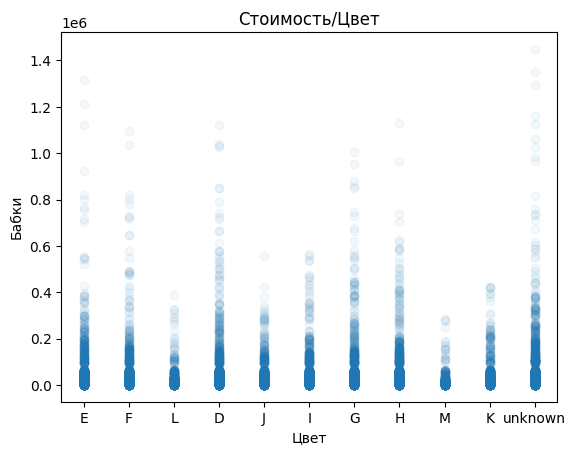

In [ ]:
x = diamonds['color']
y = diamonds['total_sales_price']
plt.scatter(
    x,
    y,
    alpha = 0.05
)
plt.xlabel("Цвет")
plt.ylabel("Бабки")
plt.title('Стоимость/Цвет')
plt.show()

(2 балла) Постройте график `лабараторная оценка - кол-во бриллиантов`:

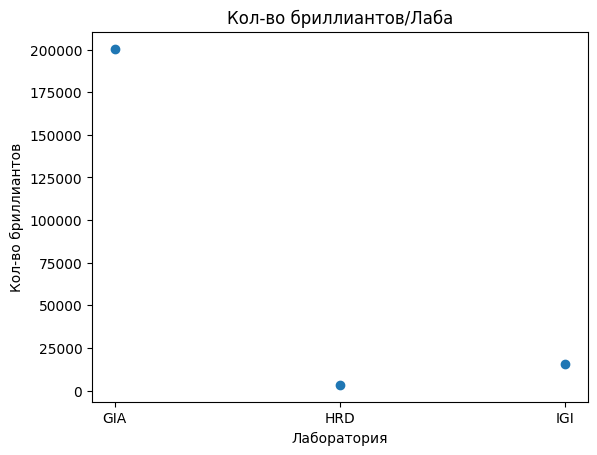

In [ ]:
labs = list(set(diamonds['lab']))
val = [len(diamonds[diamonds['lab'] == lab]) for lab in labs]
plt.scatter(
    labs,
    val,
    alpha = 1
)
plt.xlabel("Лаборатория")
plt.ylabel("Кол-во бриллиантов")
plt.title('Кол-во бриллиантов/Лаба')
plt.show()

(2 балла) Постройте график `вес бриллианта - стоимость`:

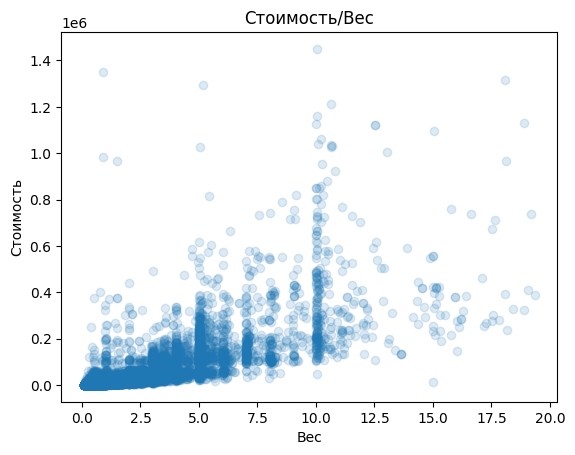

In [ ]:
plt.scatter(
    diamonds['carat_weight'],
    diamonds['total_sales_price'],
    alpha = 0.15
)
plt.xlabel("Вес")
plt.ylabel("Стоимость")
plt.title('Стоимость/Вес')
plt.show()

(2 балла) Постройте график `система оценки GIA Cut - кол-во бриллиантов`:

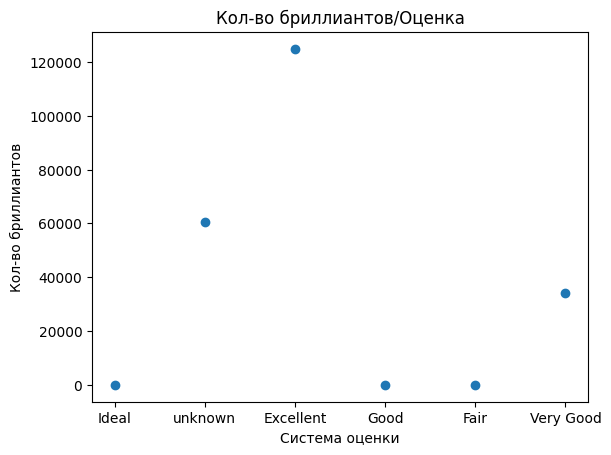

In [ ]:
qualities = list(set(diamonds['cut_quality']))
val = [len(diamonds[diamonds['cut_quality'] == quality]) for quality in qualities]
plt.scatter(
    qualities,
    val,
    alpha = 1
)
plt.xlabel("Система оценки")
plt.ylabel("Кол-во бриллиантов")
plt.title('Кол-во бриллиантов/Оценка')
plt.show()

(2 балла) **Сделайте выводы по построенным графикам:**

>*Подсказка для маленьких: Что вы можете сказать о графиках полученных выше для данного датасета?*

Стоимость бриллианта практически не зависит от его цвета, на графике цвет/стоимость у каждого цвета есть выброс в стоимости, но основное скопление у всех примерно одинаковое.

Лаборатория GIA проанализировала значительно больше бриллиантов, чем другие.

Рост стоимости бриллианата относительно его веса примерно логарифмический. Однако из-за большого числа выбросов, нельзя утверждать, что покупка большего веса будет выгоднее.

В данном датасете очень много идеальных бриллиантов)

## Задание 3. Модель - 30 баллов

В данном задании вам предстоит построить классифицирующую модель размер алмаза и его стоимости, а затем оценить полученную модель.

>**Примечание**
>
>Данная модель не претендует на самый верный индикатор стоимости алмаза, ведь мы не учитываем ничего больше чем стоимость алмаза. Исключительно для образовательных целей :)

Для построения модели нам понадобится 4 столбца, а именно: 
- `meas_length`
- `meas_width`
- `meas_depth`
- `total_sales_price`

От остальных столбцов можно избавиться.

(1 балл) Создайте новый датасет и выведите его первые 10 строк: 

In [ ]:
data = pd.DataFrame({
    'meas_length': diamonds['meas_length'],
    'meas_width': diamonds['meas_width'],
    'meas_depth': diamonds['meas_depth'],
    'total_sales_price': diamonds['total_sales_price'],
})
data.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,2.85,2.87,1.79,200
1,2.84,2.89,1.78,200
2,2.88,2.90,1.77,200
3,2.86,2.88,1.78,200
4,2.79,2.83,1.82,200
5,2.95,2.99,1.81,200
6,2.85,2.88,1.84,200
7,2.86,2.89,1.78,200
8,2.89,2.92,1.85,200
9,2.83,2.87,1.80,200


(1 балл) Перемешайте строки в датафрейме случайным образом: 

In [ ]:
data = data.sample(frac=1).reset_index(drop=True)
data.head(10)

,meas_length,meas_width,meas_depth,total_sales_price
0,7.29,7.35,4.52,17969
1,7.87,6.15,3.52,7233
2,5.08,5.11,3.19,3796
3,5.67,5.69,3.55,3399
4,6.39,6.41,3.95,7215
5,4.37,4.39,2.63,1232
6,7.96,4.99,2.96,3640
7,5.96,5.56,3.42,6548
8,4.35,4.36,2.66,668
9,7.60,5.58,3.84,14868


(1 балл) Сформируем новую колонку - для каждого бриллианта найдем сумму Минковского (p=3) по 3 измерениям бриллианта:

In [ ]:
data['mink_sum'] = [(abs(x - y) ** 3 + abs(x - z) ** 3 + abs(y - z) ** 3) ** (1 / 3)
                    for x, y, z in zip(data['meas_length'], data['meas_width'], data['meas_depth'])]
data

,meas_length,meas_width,meas_depth,total_sales_price,mink_sum
0,7.29,7.35,4.52,17969,3.528190
1,7.87,6.15,3.52,7233,4.726555
2,5.08,5.11,3.19,3796,2.400300
3,5.67,5.69,3.55,3399,2.683691
4,6.39,6.41,3.95,7215,3.086858
...,...,...,...,...,...
219698,6.22,6.30,4.05,6882,2.785359
219699,4.29,4.32,2.66,1110,2.072745
219700,4.25,4.28,2.68,742,1.997156
219701,4.03,4.06,2.39,1036,2.085343


(1 балл) Сформируем новый датасет из двух колонок - сумма Минковского и `total_sales_price`: 

In [ ]:
new_data = pd.DataFrame({
    'mink_sum': data['mink_sum'],
    'total_sales_price': data['total_sales_price']
})
new_data.head(5)

,mink_sum,total_sales_price
0,3.528190,17969
1,4.726555,7233
2,2.400300,3796
3,2.683691,3399
4,3.086858,7215


(1 балл) Разделите вашу выборку на две части в соотношении 8:2 - одна выборка будет для тренировка, а другая для тестов вашей модели:

In [ ]:
board = len(new_data) // 5 * 4
training_data = new_data[:board]
test_data = new_data[board:]
print(training_data.tail(2))
test_data.head(2)

        mink_sum  total_sales_price
175758  2.072589                956
175759  2.703824               1124


,mink_sum,total_sales_price
175760,4.832158,9423
175761,2.205524,1730


(2 балла) Постройте график зависимости стоимости от вашего нового параметра размера для тренинг-выборки:

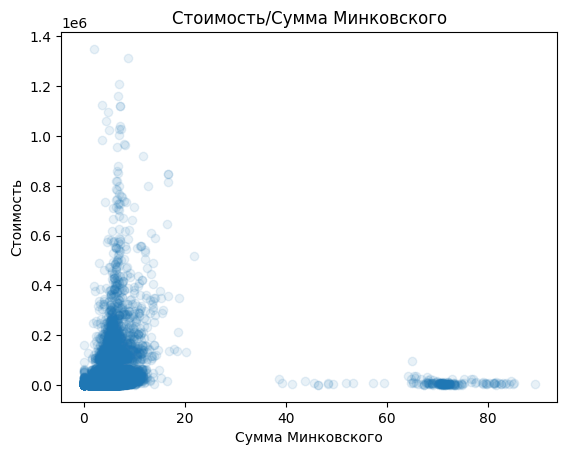

In [ ]:
plt.scatter(
    training_data['mink_sum'],
    training_data['total_sales_price'],
    alpha = 0.1
)
plt.xlabel('Сумма Минковского')
plt.ylabel('Стоимость')
plt.title('Стоимость/Сумма Минковского')
plt.show()

(2 балла) Нанесите на тот же график тестовую выборку, используя другой цвет (не забудьте про параметр прозрачности):

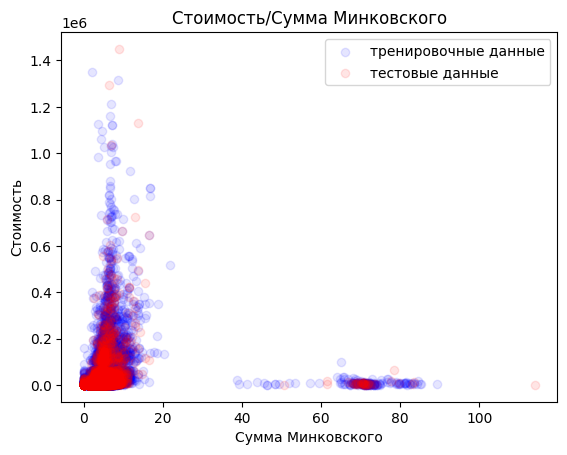

In [ ]:
plt.scatter(
    training_data['mink_sum'],
    training_data['total_sales_price'],
    color='blue',
    alpha = 0.1,
    label="тренировочные данные"
)
plt.scatter(
    test_data['mink_sum'],
    test_data['total_sales_price'],
    color='red',
    alpha = 0.1,
    label="тестовые данные"
)
plt.xlabel('Сумма Минковского')
plt.ylabel('Стоимость')
plt.title('Стоимость/Сумма Минковского')
plt.legend()
plt.show()

(3 балла) Найдите для каждой бриллианта из тестовой выборки его "ближайшего соседа" из тренинг-выборки. Для каждого бриллианта из тестовой выборки найдите расстояния до соответствующего ближайшего соседа:

In [ ]:
from numba import jit

@jit(nopython=True)
def nearest(data, val):
  mn = 1e12
  for i in range(len(data)):
    now = ((data[i][0] - val[0]) ** 2 + (data[i][1] - val[1]) ** 2) ** 0.5
    if now < mn:
      mn = now
  return mn

nump_arr1 = np.array(list(zip(training_data['mink_sum'], training_data['total_sales_price'])))
nump_arr2 = np.array(list(zip(test_data['mink_sum'], test_data['total_sales_price'])))
test_data.loc[:, ['nearest']] = [nearest(nump_arr1, elem) for elem in nump_arr2]
test_data

<ipython-input-36-49c3029fb0e1>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:, ['nearest']] = [nearest(nump_arr1, elem) for elem in nump_arr2]


,mink_sum,total_sales_price,nearest,percent
175760,4.832158,9423,0.997168,100.0
175761,2.205524,1730,0.005800,100.0
175762,3.874516,13095,0.428341,100.0
175763,2.331130,1838,0.012945,100.0
175764,2.482304,2174,0.012598,100.0
...,...,...,...,...
219698,2.785359,6882,0.043177,100.0
219699,2.072745,1110,0.000000,100.0
219700,1.997156,742,0.000000,100.0
219701,2.085343,1036,0.000000,100.0


(3 балла) Найдите насколько сильно (в процентах) отличается цена бриллиантов из тестовой выборки от их соответствующих ближайших соседей:

In [ ]:
test_data.loc[:, ['percent']] = test_data['nearest'] / test_data['total_sales_price'] * 100
test_data

<ipython-input-39-45e61697bd87>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:, ['percent']] = test_data['nearest'] / test_data['total_sales_price'] * 100


,mink_sum,total_sales_price,nearest,percent
175760,4.832158,9423,0.997168,0.010582
175761,2.205524,1730,0.005800,0.000335
175762,3.874516,13095,0.428341,0.003271
175763,2.331130,1838,0.012945,0.000704
175764,2.482304,2174,0.012598,0.000579
...,...,...,...,...
219698,2.785359,6882,0.043177,0.000627
219699,2.072745,1110,0.000000,0.000000
219700,1.997156,742,0.000000,0.000000
219701,2.085343,1036,0.000000,0.000000


**Данная модель является выдумкой автора. Не важен коэффициент ошибки, важны ваши шаги для получения коэффициента.**

### Введение в машинное обучение

Теперь давайте познакомимся с таким сильным инструментом как `sklearn`.

Вам необходимо:
1. выбрать 2 категориальных признака
2. на их основе обучить решающее дерево
3. оценить среднеквадратичную ошибку цены бриллианта
4. сделать пп. 1-3 и выбрать ту пару, которая дает лучший результат
5. сделать выводы

(3 балла) Мы работаем с категориальными признаками, для них не понятно что есть "больше" и "меньше". Поэтому нам нужно предварительно закодировать значения наших признаков, с чем нам поможет [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html):

In [ ]:
# your code here

(3 балла) Разбейте датасет на обучающую и тестовую выбору. Для этого вам поможет [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html):

In [ ]:
# your code here

(3 балла) Затем создайте и обучите вашу модель - [DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html):

In [ ]:
# your code here

(3 балла) Оцените ошибку вашей модели при помощи [mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html):

In [ ]:
# your code here

(3 балла) **Сделайте выводы какие категориальные признаки лучше:**

*Подсказки для маленьких: Что вы можете сказать о зависимости по вашей выборке признаков? Какой вы можете сделать вывод об готовых инструментах для работы и написанных Вами?*

Ваши выводы здесь :)